In [ ]:
Урок 10-2
Анализ геоданных в GeoPandas

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd

In [3]:
import geopandas as gpd
from shapely.geometry import Point

data = {
'City': ['New York', 'Los Angeles', 'Chicago', 'Houston'],
'Population': [8419600, 3990456, 2705994, 2325502]
}
df = pd.DataFrame(data)

geometry = [Point(-74.006, 40.7128), # New York (longitude, latitude)
    Point(-118.2437, 34.0522), # Los Angeles
    Point(-87.6298, 41.8781), # Chicago
    Point(-95.3698, 29.7604)] # Houston

gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326') #EPSG - код геодезической системы

print(gdf)

          City  Population                   geometry
0     New York     8419600    POINT (-74.006 40.7128)
1  Los Angeles     3990456  POINT (-118.2437 34.0522)
2      Chicago     2705994   POINT (-87.6298 41.8781)
3      Houston     2325502   POINT (-95.3698 29.7604)


In [6]:
import geopandas
from geodatasets import get_path

path_to_data = get_path("geoda airbnb")
print(path_to_data)
gdf = geopandas.read_file(path_to_data)
gdf = gdf.set_index('community')
gdf.head()

C:\Users\user\AppData\Local\geodatasets\geodatasets\Cache\airbnb.zip


,shape_area,shape_len,AREAID,response_r,accept_r,rev_rating,price_pp,room_type,num_spots,poverty,crowded,dependency,without_hs,unemployed,income_pc,harship_in,num_crimes,num_theft,population,geometry
community,,,,,,,,,,,,,,,,,,,,
DOUGLAS,46004621.1581,31027.0545098,35,98.771429,94.514286,87.777778,78.157895,1.789474,38,29.6,1.8,30.7,14.3,18.2,23791,47,5013,1241,18238,"POLYGON ((-87.60914 41.84469, -87.60915 41.844..."
OAKLAND,16913961.0408,19565.5061533,36,99.200000,90.105263,88.812500,53.775000,1.850000,20,39.7,1.3,40.4,18.4,28.7,19252,78,1306,311,5918,"POLYGON ((-87.59215 41.81693, -87.59231 41.816..."
FULLER PARK,19916704.8692,None,37,68.000000,NaN,91.750000,84.000000,1.833333,6,51.2,3.2,44.9,26.6,33.9,10432,97,1764,383,2876,"POLYGON ((-87.6288 41.80189, -87.62879 41.8017..."
GRAND BOULEVARD,48492503.1554,28196.8371573,38,94.037037,83.615385,92.750000,119.533333,1.533333,30,29.3,3.3,39.5,15.9,24.3,23472,57,6416,1428,21929,"POLYGON ((-87.60671 41.81681, -87.6067 41.8165..."
KENWOOD,29071741.9283,23325.1679062,39,92.542857,88.142857,90.656250,77.991453,1.615385,39,21.7,2.4,35.4,11.3,15.7,35911,26,2713,654,17841,"POLYGON ((-87.59215 41.81693, -87.59215 41.816..."


In [7]:
import geopandas
from geodatasets import get_path

path_to_data = get_path("geoda airbnb")
print(path_to_data)
gdf = geopandas.read_file(path_to_data)
gdf = gdf.set_index('community')
gdf['geometry'].head()

C:\Users\user\AppData\Local\geodatasets\geodatasets\Cache\airbnb.zip


community
DOUGLAS            POLYGON ((-87.60914 41.84469, -87.60915 41.844...
OAKLAND            POLYGON ((-87.59215 41.81693, -87.59231 41.816...
FULLER PARK        POLYGON ((-87.6288 41.80189, -87.62879 41.8017...
GRAND BOULEVARD    POLYGON ((-87.60671 41.81681, -87.6067 41.8165...
KENWOOD            POLYGON ((-87.59215 41.81693, -87.59215 41.816...
Name: geometry, dtype: geometry

In [ ]:
Распределение классов

In [8]:
gdf['area'] = gdf.area
gdf['area']
# здесь важный варнинг из-за того, что считаем площадь по долготе и широте и получаем фигню

C:\Users\user\AppData\Local\Temp\ipykernel_5460\315689788.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['area'] = gdf.area


community
DOUGLAS            0.000463
OAKLAND            0.000170
FULLER PARK        0.000200
GRAND BOULEVARD    0.000488
KENWOOD            0.000293
                     ...   
MOUNT GREENWOOD    0.000759
MORGAN PARK        0.000923
OHARE              0.003752
EDGEWATER          0.000489
EDISON PARK        0.000319
Name: area, Length: 77, dtype: float64

In [11]:
gdf = gdf.to_crs(epsg=6933)

gdf['area'] = gdf.area
gdf['area']
# gdf['geometry'].head()

community
DOUGLAS            4.273830e+06
OAKLAND            1.571301e+06
FULLER PARK        1.850268e+06
GRAND BOULEVARD    4.504952e+06
KENWOOD            2.700750e+06
                       ...     
MOUNT GREENWOOD    7.021929e+06
MORGAN PARK        8.535503e+06
OHARE              3.454539e+07
EDGEWATER          4.501053e+06
EDISON PARK        2.939134e+06
Name: area, Length: 77, dtype: float64

In [12]:
gdf['boundary'] = gdf.boundary
gdf['boundary']

community
DOUGLAS            LINESTRING (-8453080.119 4885919.76, -8453080....
OAKLAND            LINESTRING (-8451441.007 4883264.888, -8451455...
FULLER PARK        LINESTRING (-8454976.785 4881826.556, -8454976...
GRAND BOULEVARD    LINESTRING (-8452845.392 4883253.833, -8452845...
KENWOOD            LINESTRING (-8451441.007 4883264.888, -8451440...
                                         ...                        
MOUNT GREENWOOD    LINESTRING (-8461505.179 4872755.571, -8461502...
MORGAN PARK        LINESTRING (-8456265.244 4870641.433, -8456298...
OHARE              MULTILINESTRING ((-8475024.959 4899452.581, -8...
EDGEWATER          LINESTRING (-8457462.046 4900575.298, -8457462...
EDISON PARK        LINESTRING (-8472147.512 4900830.07, -8472148....
Name: boundary, Length: 77, dtype: geometry

In [14]:
gdf['centroid'] = gdf.centroid
gdf['centroid']


community
DOUGLAS            POINT (-8454000.296 4885004.273)
OAKLAND            POINT (-8452508.475 4883917.219)
FULLER PARK        POINT (-8455326.674 4882514.453)
GRAND BOULEVARD    POINT (-8453921.365 4882884.119)
KENWOOD            POINT (-8451829.907 4882498.393)
                                 ...               
MOUNT GREENWOOD    POINT (-8463119.643 4871580.198)
MORGAN PARK        POINT (-8458860.935 4871086.756)
OHARE              POINT (-8480535.944 4898430.046)
EDGEWATER          POINT (-8458316.973 4899482.649)
EDISON PARK        POINT (-8472825.086 4901476.187)
Name: centroid, Length: 77, dtype: geometry

In [17]:
first_point = gdf['centroid'].iloc[3] # на первое место принимает номер строки
gdf['distance'] = gdf['centroid'].distance(first_point)
gdf['distance']


community
DOUGLAS             2121.623541
OAKLAND             1750.300890
FULLER PARK         1453.115865
GRAND BOULEVARD        0.000000
KENWOOD             2126.730014
                       ...     
MOUNT GREENWOOD    14573.501604
MORGAN PARK        12789.727351
OHARE              30822.259102
EDGEWATER          17170.689225
EDISON PARK        26514.442834
Name: distance, Length: 77, dtype: float64

In [18]:
first_point = gdf.loc['DOUGLAS', 'centroid']

gdf['distance'] = gdf['centroid'].distance(first_point)
gdf['distance']

community
DOUGLAS                0.000000
OAKLAND             1845.865003
FULLER PARK         2821.078380
GRAND BOULEVARD     2121.623541
KENWOOD             3315.121298
                       ...     
MOUNT GREENWOOD    16228.625604
MORGAN PARK        14741.882745
OHARE              29738.727900
EDGEWATER          15108.178095
EDISON PARK        25013.928934
Name: distance, Length: 77, dtype: float64

<Axes: >

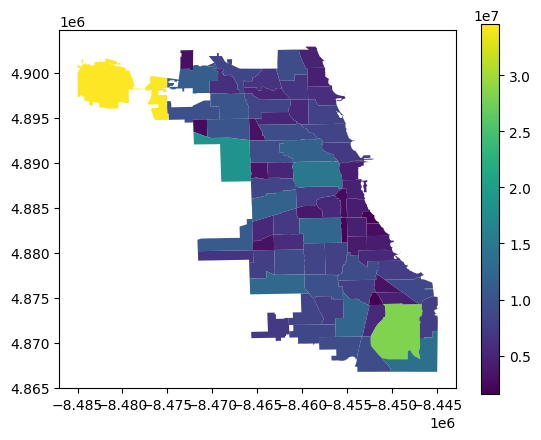

In [19]:
gdf.plot('area', legend=True)

In [23]:
import matplotlib.pyplot as plt
import folium

gdf.explore('area', legend=False)

<Axes: >

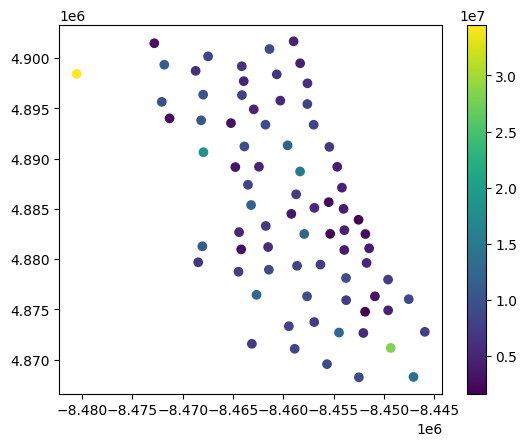

In [24]:
gdf = gdf.set_geometry('centroid')
gdf.plot('area', legend=True)


<Axes: >

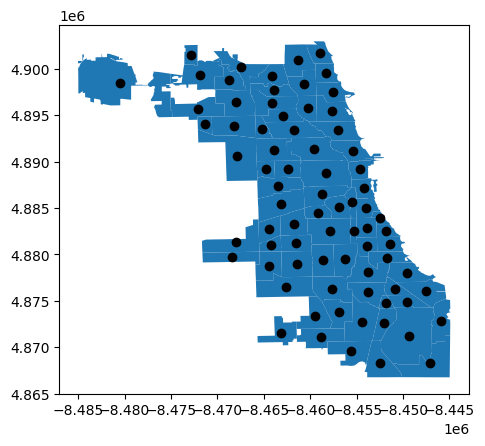

In [25]:
ax = gdf['geometry'].plot()
gdf['centroid'].plot(ax=ax, color='black')

In [ ]:
Prakticum

In [ ]:
1. Загрузите данные о районах Барселоны

In [35]:
url = 'https://raw.githubusercontent.com/jcanalesluna/bcn-geodata/master/districtes/districtes.geojson'
distr = gpd.read_file(url)
distr.head()

,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,ELEM_DESCR,...,ESTIL_ID,ESTIL_QGIS,VALOR1QGIS,VALOR2QGIS,COL_FARCIT,FCOL_DESCR,FHEX_COLOR,COL_DESCR,HEX_COLOR7,geometry
0,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.18345 41.39061, 2.18459 41.38976, ..."
1,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.1869 41.40165, 2.18689 41.40087, 2..."
2,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((2.14824 41.37623, 2.14896 41.3..."
3,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.10342 41.4011, 2.10352 41.40109, 2..."
4,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((2.07313 41.43522, 2.07319 41.4..."


In [ ]:
Изобразите на карте области вместе с центроидами. Области должны быть
окрашены цветом в зависимости от их отдаленности от Саграды Фамилии:

from shapely.geometry import Point

sagrada_fam = Point(2.1743680500855005, 41.403656946781304)
sagrada_fam = gpd.GeoSeries(sagrada_fam, crs=4326)
sagrada_fam = sagrada_fam.to_crs(epsg=2062)

In [36]:
distr = distr.to_crs(epsg=2062)
distr['centroid'] = distr.centroid

<Axes: >

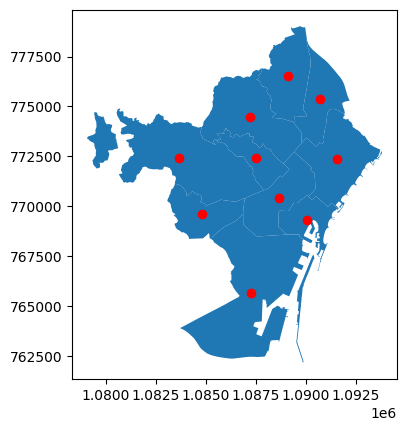

In [37]:
fig, ax = plt.subplots()
dist.plot(ax=ax)
dist['centroid'].plot(ax=ax, color = 'red')

<Axes: >

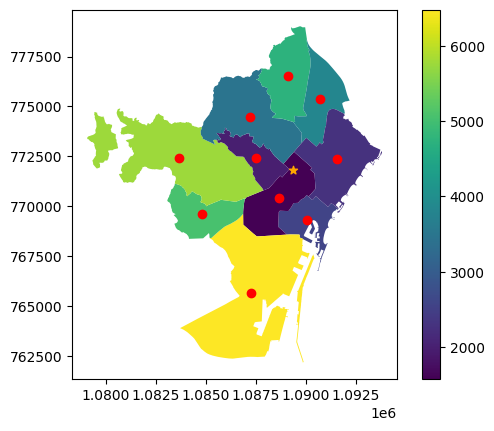

In [39]:
sagrada_fam = Point(2.1743680500855005, 41.403656946781304)
sagrada_fam = gpd.GeoSeries(sagrada_fam, crs=4326)
sagrada_fam = sagrada_fam.to_crs(epsg=2062)


distr['distance'] = distr['centroid'].distance(sagrada_fam[0])
fig, ax = plt.subplots()
distr.plot(ax=ax, column='distance', legend=True)
distr['centroid'].plot(ax=ax, color='red')
sagrada_fam.plot(ax=ax, marker='*', color='orange')